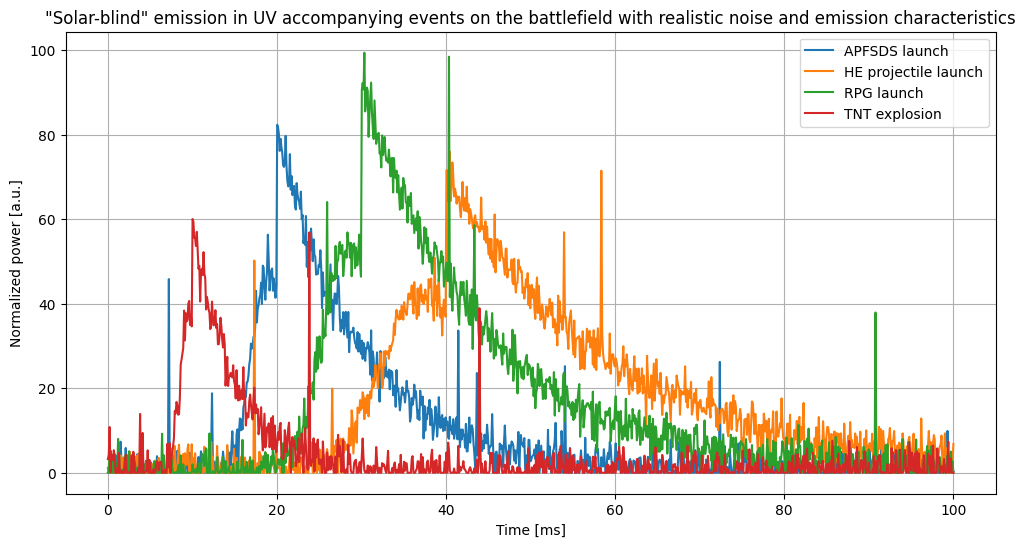

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time domain
time_ms = np.linspace(0, 100, 1000)  # Time from 0 to 100 milliseconds

# Define emission characteristics for each event with rough estimations
characteristics = {
    'APFSDS launch': {'center_time': 20, 'rise_time': 2, 'fall_time': 10, 'peak_amplitude': 80},
    'HE projectile launch': {'center_time': 40, 'rise_time': 5, 'fall_time': 20, 'peak_amplitude': 70},
    'RPG launch': {'center_time': 30, 'rise_time': 3, 'fall_time': 15, 'peak_amplitude': 90},
    'TNT explosion': {'center_time': 10, 'rise_time': 1, 'fall_time': 5, 'peak_amplitude': 60}
}

# Simulate a realistic emission peak with rise and fall characteristics
def simulate_emission(time, center_time, rise_time, fall_time, peak_amplitude):
    # Gaussian rise
    rise_phase = np.exp(-((time - center_time + rise_time / 2)**2 / (2 * rise_time**2)))
    # Exponential fall
    fall_phase = np.exp(-((time - center_time - fall_time / 2) / fall_time))
    # Assemble the emission profile
    emission = np.where(time < center_time, peak_amplitude * rise_phase, peak_amplitude * fall_phase)
    # Normalize and ensure no negative values
    emission = np.clip(emission / np.max(emission) * peak_amplitude, 0, None)
    return emission

# Generate emission data for each event
emissions = {event: simulate_emission(time_ms, **params) for event, params in characteristics.items()}

# Simulate realistic battlefield noise
def simulate_battlefield_noise(time, noise_level_base, noise_level_spike, spike_probability):
    """
    Simulate realistic battlefield noise including random fluctuations and sporadic spikes.
    """
    random_noise = np.random.normal(0, noise_level_base, len(time))
    spikes = np.random.choice([0, 1], size=len(time), p=[1 - spike_probability, spike_probability])
    spike_noise = spikes * np.random.normal(0, noise_level_spike, len(time))
    total_noise = random_noise + spike_noise
    return total_noise

# Add noise to each emission with battlefield characteristics
noise_level_base = 3  # Base noise level
noise_level_spike = 30  # Spike noise level
spike_probability = 0.01  # Probability of a spike occurring at a given time point

noisy_emissions = {}
for event, emission in emissions.items():
    noise = simulate_battlefield_noise(time_ms, noise_level_base, noise_level_spike, spike_probability)
    noisy_emissions[event] = np.clip(emission + noise, 0, None)  # Ensure no negative values

# Plot the emissions with noise
plt.figure(figsize=(12, 6))
for event, emission in noisy_emissions.items():
    plt.plot(time_ms, emission, label=event)

# Add labels and legend
plt.title('"Solar-blind" emission in UV accompanying events on the battlefield with realistic noise and emission characteristics')
plt.xlabel('Time [ms]')
plt.ylabel('Normalized power [a.u.]')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import matplotlib.animation as animation

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Setting up the plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 140)

# Titles and labels
ax.grid(True, which='both', linestyle='--', color='grey', alpha=0.5)
ax.set_title('"Solar-blind" emission in UV accompanying events on the battlefield')
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Normalized power [a.u.]')

# Preparing lines to update during animation, one for each event
lines = {event: ax.plot(time_ms, noisy_emissions[event], label=event)[0] for event in noisy_emissions}
# Adding a legend
ax.legend(loc='upper right')

# Initialization function for the animation
def init():
    for line in lines.values():
        line.set_data([], [])
    return lines.values()

# Animation function which updates the plot
def animate(i):
    for event, line in lines.items():
        line.set_data(time_ms[:i], noisy_emissions[event][:i])
    return lines.values()

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(time_ms), interval=25, blit=True)

# Save the animation as a GIF file
gif_path = 'battlefield_uv_emission2.gif'
ani.save(gif_path, writer='imagemagick', fps=40)

plt.close(fig)  # Close the figure to prevent it from displaying

gif_path  # Return the path to the saved GIF file


'battlefield_uv_emission2.gif'